In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10,mnist
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [4]:
(xtr,ytr),(xts,yts)=mnist.load_data()
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],1)
print(xtr.shape)
xtr=xtr/255.0
xts=xts/255.0
lb=LabelBinarizer()
ytr=lb.fit_transform(ytr)
yts=lb.fit_transform(yts)

(60000, 28, 28, 1)


In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
h=model.fit(xtr,ytr,validation_data=(xts,yts),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1781 - accuracy: 0.9459 - val_loss: 0.0672 - val_accuracy: 0.9809
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0646 - accuracy: 0.9800 - val_loss: 0.0449 - val_accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.0528 - val_accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0394 - val_accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0509 - val_accuracy: 0.9847


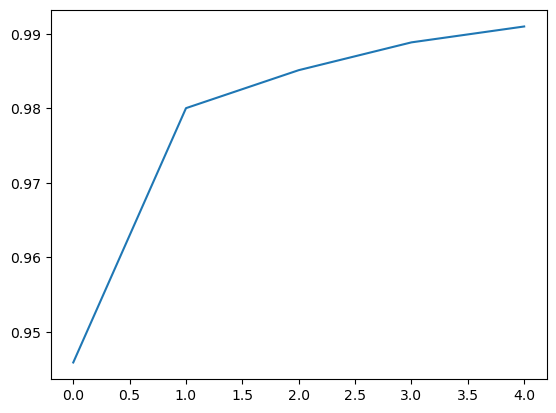

In [12]:
plt.plot(np.arange(0,5),h.history['accuracy'])

In [14]:
predictions=model.predict(xts)
print(classification_report(yts.argmax(axis=1),predictions.argmax(axis=1)))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.98      1028
           8       1.00      0.96      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

